In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
import scanpy as sc
from itertools import chain


import itertools
import networkx as nx

import torch
import scglue
import seaborn as sns
from matplotlib import rcParams
print(ad.__version__)

0.10.5.post1


In [55]:
rna = ad.read_h5ad("rnalbc_0918.h5ad")
meta= ad.read_h5ad("meta9_2_0918.h5ad")
guidance = nx.read_graphml("Guidance_0918.graphml.gz")

In [56]:
np.random.seed(42)
# 设置随机种子

random_indices = np.random.choice(meta.shape[0], 2172, replace=False)
meta = meta[random_indices, :]

In [57]:
glue = scglue.models.load_model("glue_ok.dill")

In [58]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
meta.obsm["X_glue"] = glue.encode_data("meta", meta)
rna.obs['domain'] = 'rna'
meta.obs['domain'] = 'meta'
combined = ad.concat([rna, meta])

/tmp/ipykernel_2737/1554389241.py:2: ImplicitModificationWarning: Setting element `.obsm['X_glue']` of view, initializing view as actual.
  meta.obsm["X_glue"] = glue.encode_data("meta", meta)


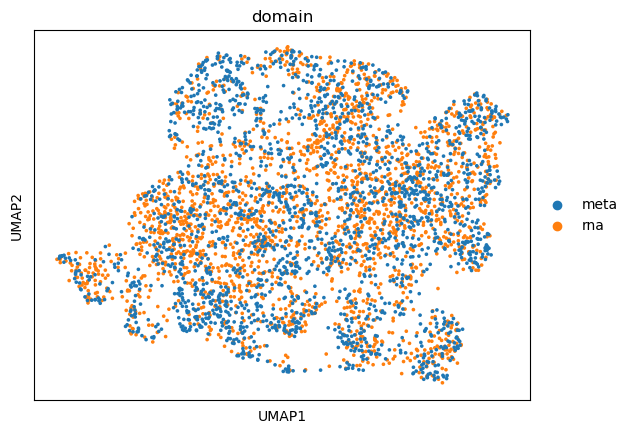

In [59]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color='domain', wspace=0.65)

In [60]:
combined.write_h5ad("combined9_2_0920.h5ad")

In [3]:
meta_full= ad.read_h5ad("meta9_2_0918.h5ad")

In [4]:
glue = scglue.models.load_model("glue_ok.dill")

[INFO] autodevice: Using CPU as computation device.


In [5]:
meta_full.obsm["X_glue"] = glue.encode_data("meta", meta_full)

/home/boyao/miniconda3/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [6]:
meta_full.write_h5ad("meta_full9_2_0920.h5ad")